## This notebook will cover to main point :
### >Web scraping : get data from World bank API and save as csv file
### >Builb a forecasting model to predict the Republic of Cote d'Ivoire population growth rate

## Data from World bank API and save as csv file

In [1]:
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
indicator_id = 'SP.POP.GROW'
result = wb.search(string=indicator_id,field = 'id')
result

,id,name,source,sourceNote,sourceOrganization,topics,unit
11919,SP.POP.GROW,Population growth (annual %),World Development Indicators,Annual population growth rate for year t is th...,b'Derived from total population. Population so...,Climate Change ; Health,


In [3]:
# Get a list of countries and clean it up
countries = wb.get_countries()
countries.head(5)

,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,name,region
0,,Oranjestad,ABW,High income,AW,12.51670,Not classified,-70.0167,Aruba,Latin America & Caribbean
1,South Asia,Kabul,AFG,Low income,AF,34.52280,IDA,69.1761,Afghanistan,South Asia
2,,,AFR,Aggregates,A9,NaN,Aggregates,NaN,Africa,Aggregates
3,Sub-Saharan Africa (excluding high income),Luanda,AGO,Lower middle income,AO,-8.81155,IBRD,13.2420,Angola,Sub-Saharan Africa
4,Europe & Central Asia (excluding high income),Tirane,ALB,Upper middle income,AL,41.33170,IBRD,19.8172,Albania,Europe & Central Asia


In [4]:
#Select only those observations and columns we need: 
countries = countries[countries.incomeLevel != 'Aggregates']
#countries = countries[countries.region.isin(l_countries)]
countries.head()

,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,name,region
0,,Oranjestad,ABW,High income,AW,12.51670,Not classified,-70.0167,Aruba,Latin America & Caribbean
1,South Asia,Kabul,AFG,Low income,AF,34.52280,IDA,69.1761,Afghanistan,South Asia
3,Sub-Saharan Africa (excluding high income),Luanda,AGO,Lower middle income,AO,-8.81155,IBRD,13.2420,Angola,Sub-Saharan Africa
4,Europe & Central Asia (excluding high income),Tirane,ALB,Upper middle income,AL,41.33170,IBRD,19.8172,Albania,Europe & Central Asia
5,,Andorra la Vella,AND,High income,AD,42.50750,Not classified,1.5218,Andorra,Europe & Central Asia


In [5]:
l_countries = ['Australia','Rwanda',"Cote d'Ivoire", "Cameroon", "Ethiopia"]
countries_codes = countries.iso3c[countries.name.isin(l_countries)]
countries_codes

13     AUS
50     CIV
53     CMR
95     ETH
237    RWA
Name: iso3c, dtype: object

In [6]:
reader = wb.WorldBankReader(symbols=indicator_id,countries = countries_codes,start=1960)
country_df = reader.read()
country_df.head()

SP.POP.GROW
country   year             
Australia 2018          NaN
          2017     1.684523
          2016     1.561940
          2015     1.439217
          2014     1.491566

In [7]:
country_df = country_df.unstack(level=0)[indicator_id]
country_df.to_csv("countries.csv")
country_df.tail()

country,Australia,Cameroon,Cote d'Ivoire,Ethiopia,Rwanda
year,,,,,
2014,1.491566,2.661876,2.539767,2.579068,2.500797
2015,1.439217,2.638536,2.529163,2.541469,2.474095
2016,1.561940,2.613585,2.510354,2.501821,2.445905
2017,1.684523,2.588059,2.495744,2.463699,2.411623
2018,NaN,NaN,NaN,NaN,NaN


In [302]:
country_df[["Cote d\'Ivoire"]].to_csv("cote_divoire_growth.csv")
country_df[["Cote d\'Ivoire"]].head(10)


country,Cote d'Ivoire
year,
1960,3.518860
1961,3.728914
1962,3.898586
1963,3.977808
1964,3.949645
1965,3.864413
1966,3.755989
1967,3.700273
1968,3.749947


In [303]:
country_df[["Cote d\'Ivoire"]].tail(10)

country,Cote d'Ivoire
year,
2009,2.223432
2010,2.305464
2011,2.392464
2012,2.473506
2013,2.525016
2014,2.539767
2015,2.529163
2016,2.510354
2017,2.495744


## Now we are going to estimate the population growth rate for the 10 next years

In [8]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime

plt.style.use('fivethirtyeight')

In [9]:
cote_divoire = pd.read_csv("cote_divoire_growth.csv", index_col="year", parse_dates=True)
cote_divoire.head()

cote_divoire.rename({"Cote d'Ivoire":"pop_growth_rate"},axis=1, inplace=True)

cote_divoire.head()

,pop_growth_rate
year,
1960-01-01,3.518860
1961-01-01,3.728914
1962-01-01,3.898586
1963-01-01,3.977808
1964-01-01,3.949645


In [10]:
cote_divoire.tail()

,pop_growth_rate
year,
2014-01-01,2.539767
2015-01-01,2.529163
2016-01-01,2.510354
2017-01-01,2.495744
2018-01-01,NaN


In [11]:
cote_divoire.loc["2018-01-01","pop_growth_rate"] = cote_divoire.loc["2017-01-01", "pop_growth_rate"]

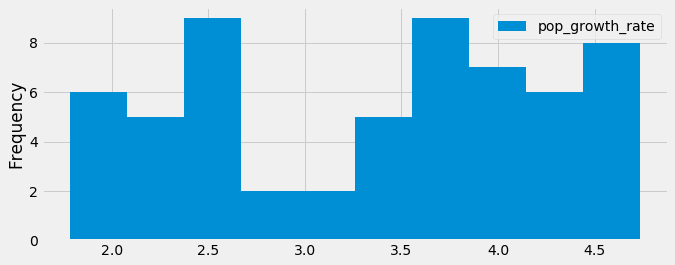

In [12]:
cote_divoire.plot(kind="hist",bins=10,figsize=(10, 4))
plt.savefig("growth_hist.png")
plt.show()

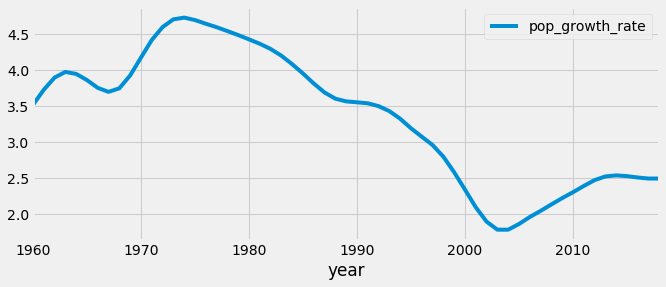

In [13]:

cote_divoire.plot(figsize=(10, 4))
plt.savefig("growth_behavior.png")
plt.show()

### The following dataframe contain the results of the parameter's estimation under some criteria (see notebook Arima). Because this can take long we have  decided to put this task in an other notebook.

In [55]:

names=["AIC","arima_model","dynamic_prediction_error","non_dynamic_prediction_error"]
estimated_parameters = pd.read_csv("param_estimated.dat", delimiter=";", names=names)
estimated_parameters

,AIC,arima_model,dynamic_prediction_error,non_dynamic_prediction_error
0,-74.280006,"\tARIMA(1, 0, 3)x(3, 0, 1, 12)12",0.004591,0.000738
1,-93.668752,"\tARIMA(2, 0, 0)x(3, 0, 0, 12)12",0.002382,0.000415
2,-91.789633,"\tARIMA(2, 0, 0)x(3, 0, 1, 12)12",0.003377,0.000407
3,-98.943559,"\tARIMA(2, 0, 1)x(3, 0, 0, 12)12",0.002635,0.000286
4,-98.510622,"\tARIMA(2, 0, 3)x(3, 0, 0, 12)12",0.002417,0.000234
5,-89.514039,"\tARIMA(2, 0, 3)x(3, 0, 1, 12)12",0.003277,0.000266
6,-92.455668,"\tARIMA(2, 0, 4)x(3, 0, 1, 12)12",0.002553,0.000242
7,-93.433195,"\tARIMA(2, 0, 5)x(3, 0, 0, 12)12",0.004061,0.000236
8,-96.359569,"\tARIMA(2, 1, 0)x(3, 0, 1, 12)12",0.002704,0.000214
9,-88.932882,"\tARIMA(3, 0, 1)x(3, 0, 0, 12)12",0.004742,0.000315


In [56]:
## From the table above the best one is the last one
mod = sm.tsa.statespace.SARIMAX(cote_divoire,
                                order=(4, 0, 5),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/home/ebiele/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/ebiele/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.8216      0.898      3.142      0.002       1.061       4.582
ar.L2         -3.3368      1.916     -1.742      0.082      -7.092       0.418
ar.L3          2.0564      1.611      1.277      0.202      -1.101       5.214
ar.L4         -0.5754      0.582     -0.990      0.322      -1.715       0.564
ma.L1          0.2633     21.020      0.013      0.990     -40.935      41.461
ma.L2         -0.1225      4.836     -0.025      0.980      -9.601       9.356
ma.L3          0.0720      9.332      0.008      0.994     -18.219      18.363
ma.L4          0.2279     18.707      0.012      0.990     -36.437      36.893
ma.L5         -0.6167     15.424     -0.040      0.968     -30.848      29.614
ar.S.L12       0.0547      0.760      0.072      0.943      -1.435       1.544
ar.S.L24       0.3714      0.556      0.668      0.5

/home/ebiele/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


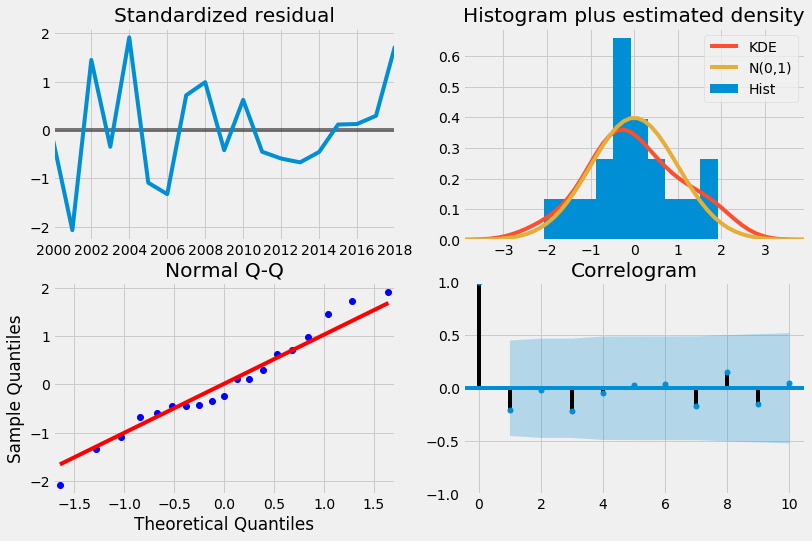

In [57]:
results.plot_diagnostics(figsize=(12, 8))
plt.savefig("growth_diagonstic.png")
plt.show()

In [58]:
pred = results.get_prediction(start=pd.to_datetime("2000-01-01"), dynamic=False)
pred_ci = pred.conf_int()

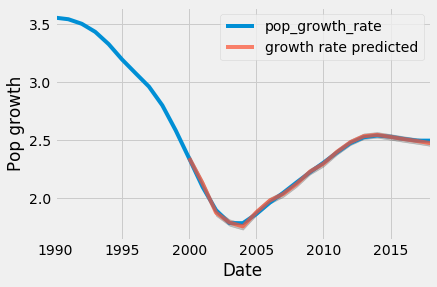

In [59]:
ax = cote_divoire["1990":].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='growth rate predicted', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Pop growth')
plt.legend()
plt.savefig("growth_prediction.png")
plt.show()

In [60]:
y_forecasted = pred.predicted_mean
y_truth = cote_divoire['2000-01-01':]

y_forecasted = np.array(y_forecasted.tolist() )
y_truth = np.array(y_truth["pop_growth_rate"].tolist() )


In [61]:
# Compute the mean square error
mse = np.mean( ( y_forecasted - y_truth ) ** 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

The Mean Squared Error of our forecasts is 0.0002


In [62]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

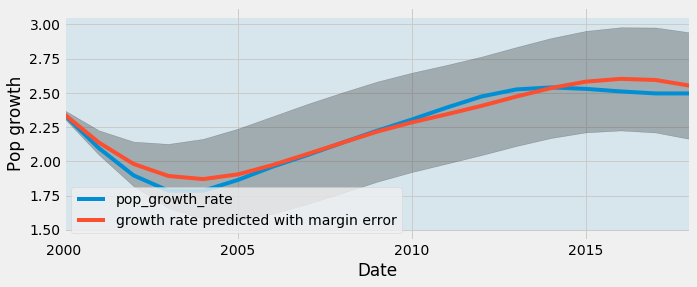

In [63]:
ax = cote_divoire['2000':].plot(label='observed', figsize=(10, 4))
pred_dynamic.predicted_mean.plot(label='growth rate predicted with margin error', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-01-01'), cote_divoire.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Pop growth')
plt.savefig("growth_forecat.png")
plt.legend(loc=3)
plt.show()

In [64]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = cote_divoire['2000-01-01':]

y_forecasted = np.array(y_forecasted.tolist() )
y_truth = np.array(y_truth["pop_growth_rate"].tolist() )

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

The Mean Squared Error of our forecasts is 0.00335


In [65]:
# Get forecast 10 steps ahead in future
pred_uc = results.get_forecast(steps=10)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

/home/ebiele/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


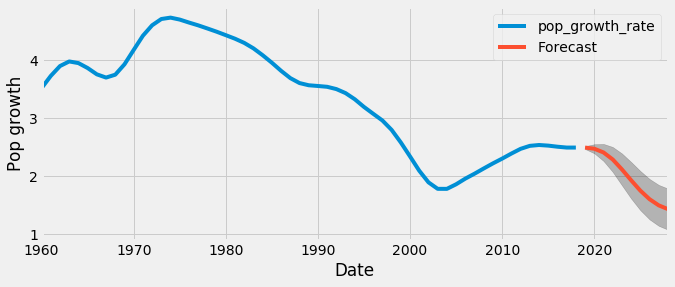

In [66]:
ax = cote_divoire.plot(label='observed', figsize=(10, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pop growth')

plt.legend()
plt.savefig("growth_and_forecastGrowth.png")
plt.show()